In [2]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install nnsight transformers

Found existing installation: torch 2.4.1+cu124
Uninstalling torch-2.4.1+cu124:
  Successfully uninstalled torch-2.4.1+cu124
Found existing installation: torchvision 0.19.1+cu124
Uninstalling torchvision-0.19.1+cu124:
  Successfully uninstalled torchvision-0.19.1+cu124
Found existing installation: torchaudio 2.4.1+cu124
Uninstalling torchaudio-2.4.1+cu124:
  Successfully uninstalled torchaudio-2.4.1+cu124
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 244.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 378.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 330.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 241.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 144.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 191.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!git clone https://github.com/madhuri723/MATS-proposal.git
cd MATS-proposal


In [1]:
!pip install scikit-learn
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 315.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 246.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 177.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 149.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 199.9 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.7
    Uninstalling pyparsing-2.4.7:
      Successfully uninstalled pyparsing-2.4.7

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
#Hugging face token

In [3]:
import torch
import torchvision
print(f"Torch: {torch.__version__}")
print(f"TorchVision: {torchvision.__version__}")

# If this works, your main script will work
from transformers import PreTrainedModel
print("Success: Transformers loaded correctly.")

Torch: 2.5.1+cu121
TorchVision: 0.20.1+cu121
Success: Transformers loaded correctly.


### Accuracy check

In [4]:
from nnsight import LanguageModel
import torch

model = LanguageModel('google/gemma-2-2b', device_map='auto', torch_dtype=torch.float16)
def test_accuracy():
    # CRITICAL FIX: Use 'google/gemma-2-2b' (Gen 2), not 'gemma-2b' (Gen 1)
    # The video uses Gen 2, which is much smarter.
    
    
    # Setup Data
    tx_cities = [
        "Houston", "San Antonio", "Dallas", "Austin", "Fort Worth", "El Paso", 
        "Arlington", "Corpus Christi", "Plano", "Lubbock", "Laredo", "Irving", 
        "Garland", "Frisco", "Amarillo"
    ]
    ca_cities = [
        "Los Angeles", "San Diego", "San Jose", "San Francisco", "Fresno", 
        "Sacramento", "Long Beach", "Oakland", "Bakersfield", "Anaheim", 
        "Stockton", "Riverside", "Santa Ana", "Irvine", "Chula Vista"
    ]

    targets = [("Austin", tx_cities), ("Sacramento", ca_cities)]
    correct_count = 0
    total = 0

    print(f"{'City':<20} | {'Target':<12} | {'Prediction':<30} | {'Result'}")
    print("-" * 75)

    # Few-Shot Prefix (Still good practice for Base models)
    few_shot_prefix = (
        "The capital of the state containing Seattle is Olympia.\n"
        "The capital of the state containing Miami is Tallahassee.\n"
        "The capital of the state containing Buffalo is Albany.\n"
    )

    for correct_capital, cities in targets:
        for city in cities:
            prompt = f"{few_shot_prefix}The capital of the state containing {city} is"
            
            output_proxy = None 

            try:
                with model.generate(prompt, max_new_tokens=3) as generator:
                    output_proxy = model.generator.output.save()
            except Exception as e:
                print(f"Error {city}: {e}")
                continue

            if output_proxy is not None and output_proxy is not None:
                full_text = model.tokenizer.decode(output_proxy[0])
                # Extract new text
                prediction = full_text[len(prompt):].strip().split('\n')[0] 
                
                is_correct = correct_capital.lower() in prediction.lower()
                if is_correct:
                    correct_count += 1
                
                print(f"{city:<20} | {correct_capital:<12} | {prediction:<30} | {is_correct}")
                total += 1

    print("-" * 75)
    print(f"Final Accuracy: {correct_count}/{total} ({correct_count/total:.2%})")

if __name__ == "__main__":
    test_accuracy()

config.json:   0%|          | 0.00/818 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


tokenizer_config.json:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

City                 | Target       | Prediction                     | Result
---------------------------------------------------------------------------


model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/481M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

You have set `compile_config`, but we are unable to meet the criteria for compilation. Compilation will be skipped.


Houston              | Austin       | on is Austin.                  | True
San Antonio          | Austin       | io is Austin.                  | True
Dallas               | Austin       | as is Austin.                  | True
Austin               | Austin       | in is Austin.                  | True
Fort Worth           | Austin       | th is Austin.                  | True
El Paso              | Austin       | so is Austin.                  | True
Arlington            | Austin       | on is Austin.                  | True
Corpus Christi       | Austin       | ti is Austin.                  | True
Plano                | Austin       | no is Austin.                  | True
Lubbock              | Austin       | ck is Austin.                  | True
Laredo               | Austin       | do is Austin.                  | True
Irving               | Austin       | ng is Austin.                  | True
Garland              | Austin       | nd is Austin.                  | True
Frisco      

### Isolating the state vector

In [9]:
import torch
import numpy as np
from nnsight import LanguageModel

# 1. Setup Data
tx_cities = [
    "Houston", "San Antonio", "Dallas", "Austin", "Fort Worth", "El Paso", "Arlington", "Corpus Christi", "Plano", "Lubbock",
    "Laredo", "Irving", "Garland", "Frisco", "Amarillo", "Brownsville", "Waco", "Tyler", "Odessa", "Midland",
    "Abilene", "Beaumont", "Denton", "McAllen", "Killeen", "Pasadena", "Mesquite", "Galveston", "Victoria", "Wichita Falls",
    "Mission", "Pharr", "Harlingen", "Sugar Land", "Pearland", "San Angelo", "Lewisville", "Richardson", "Round Rock", "College Station",
    "League City", "Allen", "Edinburg", "Bryan", "Baytown", "Longview", "Flower Mound", "Missouri City", "North Richland Hills", "Mansfield"
]

ca_cities = [
        "Los Angeles", "San Diego", "San Jose", "San Francisco", "Fresno", "Sacramento", "Long Beach", "Oakland", "Bakersfield", "Anaheim",
        "Stockton", "Riverside", "Santa Ana", "Irvine", "Chula Vista", "Fremont", "San Bernardino", "Modesto", "Fontana", "Santa Clarita",
        "Oxnard", "Moreno Valley", "Huntington Beach", "Glendale", "Santa Rosa", "Oceanside", "Rancho Cucamonga", "Ontario", "Lancaster", "Elk Grove",
        "Palmdale", "Corona", "Salinas", "Pomona", "Torrance", "Escondido", "Roseville", "Pasadena", "Orange", "Fullerton",
        "Visalia", "Concord", "Santa Clara", "Simi Valley", "Victorville", "Vallejo", "Berkeley", "Solvang", "Ojai", "Weed"
    ]
LAYER = 16  # Concept Hub

# --- PHASE 2: EXTRACT STATE DIRECTION ---
print("Extracting State Direction...")
tx_acts = []
ca_acts = []

# Trace Texas Sentences (Full)
for city in tx_cities:
    with model.trace(f"The city of {city} is in Texas", validate=False):
        # Save at last token ("Texas")
        tx_acts.append(model.model.layers[LAYER].output[0][:, -1, :].save())

# Trace California Sentences (Full)
for city in ca_cities:
    with model.trace(f"The city of {city} is in California", validate=False):
        # Save at last token ("California")
        ca_acts.append(model.model.layers[LAYER].output[0][:, -1, :].save())

# Compute Mean and Difference
mu_tx = torch.stack([t for t in tx_acts]).mean(dim=0).squeeze()
mu_ca = torch.stack([c for c in ca_acts]).mean(dim=0).squeeze()
theta_state = mu_tx - mu_ca  # The State Vector

print(f"State Vector extracted. Norm: {torch.norm(theta_state):.4f}")



Extracting State Direction...
State Vector extracted. Norm: 82.5000


### Intervention 

Starting Causal Sweep on 26 layers across 10 cities...
--------------------------------------------------
Layer  | Avg Logit Diff  | Status
0      | 2.7359          | *****
1      | 2.9750          | *****
2      | 0.2578          | 
3      | 1.4359          | **
4      | 0.1484          | 
5      | -1.0656          | 
6      | -0.2188          | 
7      | -1.7391          | 
8      | -0.9313          | 
9      | -1.5469          | 
10     | -0.6328          | 
11     | -1.1375          | 
12     | -1.1281          | 
13     | -1.3234          | 
14     | 0.0547          | 
15     | 4.4141          | ********
16     | 0.8906          | *
17     | 2.9672          | *****
18     | 4.7828          | *********
19     | 7.7531          | ***************
20     | 3.0844          | ******
21     | 2.3734          | ****
22     | 0.0234          | 
23     | 0.3094          | 
24     | 0.8063          | *
25     | 0.5078          | *


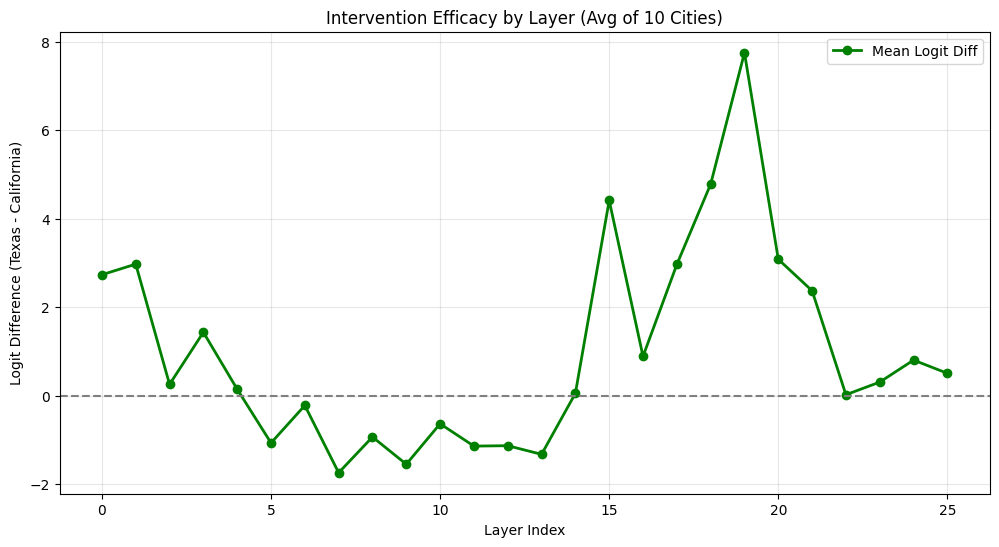


ROBUST BEST LAYER: 19
Peak Efficacy (Avg Diff): 7.7531
SUCCESS: Layer 19 is a potent steering hub.
Action: Update 'LAYER' variable in your NIE script to this index.


In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 1. Setup Validation Data
# We use 10 distinct California cities to ensure the layer works generally, not just for one specific case.
test_cities = [
    "Los Angeles", "San Diego", "San Jose", "San Francisco", "Fresno", 
    "Sacramento", "Long Beach", "Oakland", "Bakersfield", "Anaheim"
]

# 2. Setup Tokens & Vector
# Ensure theta_state is a torch tensor on the correct device
if isinstance(theta_state, np.ndarray):
    theta_state = torch.tensor(theta_state).float()
theta_state = theta_state.to(model.device)

# Token IDs for Logit Diff
tx_token = model.tokenizer.encode(" Texas", add_special_tokens=False)[0]
ca_token = model.tokenizer.encode(" California", add_special_tokens=False)[0]

def get_logit_diff(logits_tensor):
    # Logits shape: (Batch, Seq, Vocab). We want last token of first batch.
    return (logits_tensor[0, -1, tx_token] - logits_tensor[0, -1, ca_token]).item()

# 3. Sweep Configuration
layers_to_test = list(range(len(model.model.layers))) # Scan all 26 layers
alpha = 1.0 # Steering strength
avg_results = []

print(f"Starting Causal Sweep on {len(layers_to_test)} layers across {len(test_cities)} cities...")
print("-" * 50)
print(f"{'Layer':<6} | {'Avg Logit Diff':<15} | {'Status'}")

# 4. Execution Loop
for layer in layers_to_test:
    layer_scores = []
    
    for city in test_cities:
        prompt = f"The city of {city} is in"
        
        # NNsight v0.5+ Trace
        with model.trace(prompt, validate=False):
            # 1. Access the residual stream at the target layer
            current_hidden = model.model.layers[layer].output[0][:, -1, :]
            
            # 2. Intervention: Add the State Vector
            # We modify the stream in-place for the forward pass
            model.model.layers[layer].output[0][:, -1, :] = current_hidden + (alpha * theta_state)
            
            # 3. Save the resulting logits
            # In v0.5+, 'patched_logits' will hold the data after the block exits
            patched_logits = model.lm_head.output.save()
            
        # 4. Calculate Score using the resolved tensor
        # Note: We access patched_logits directly (it acts as the tensor)
        score = get_logit_diff(patched_logits)
        layer_scores.append(score)
    
    # Average across all 10 cities for this layer
    avg_score = np.mean(layer_scores)
    avg_results.append(avg_score)
    
    # Visual progress bar
    bar = "*" * int(max(0, avg_score) * 2) 
    print(f"{layer:<6} | {avg_score:.4f}          | {bar}")

# 5. Visualization & Selection
plt.figure(figsize=(12, 6))
plt.plot(layers_to_test, avg_results, marker='o', color='green', linewidth=2, label='Mean Logit Diff')
plt.title(f"Intervention Efficacy by Layer (Avg of {len(test_cities)} Cities)")
plt.xlabel("Layer Index")
plt.ylabel("Logit Difference (Texas - California)")
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Automatic Selection
best_layer_idx = np.argmax(avg_results)
best_score = avg_results[best_layer_idx]

print("\n" + "="*40)
print(f"ROBUST BEST LAYER: {best_layer_idx}")
print(f"Peak Efficacy (Avg Diff): {best_score:.4f}")
print("="*40)

# 6. Next Step Recommendation
if best_score > 2.0:
    print(f"SUCCESS: Layer {best_layer_idx} is a potent steering hub.")
    print("Action: Update 'LAYER' variable in your NIE script to this index.")
else:
    print("WARNING: Steering effect is weak. Try increasing 'alpha' or checking the vector.")

### NIE Score

In [14]:
# --- PHASE 3: CAUSAL INTERVENTION (NIE) ---
print("\nCalculating NIE...")

# Token IDs for Logit Diff
tx_token = model.tokenizer.encode(" Texas", add_special_tokens=False)[0]
ca_token = model.tokenizer.encode(" California", add_special_tokens=False)[0]

def get_logit_diff(logits):
    return (logits[0, -1, tx_token] - logits[0, -1, ca_token]).item()

diff_tx_clean = []   # Original Texas
diff_ca_clean = []   # Original California
diff_ca_patched = [] # California + Vector

alpha = 1.0 # Steering strength

for i in range(len(ca_cities)):
    # 1. Diff_Original_TX (Baseline High)
    with model.trace(f"The city of {tx_cities[i]} is in", validate=False):
        logits_tx = model.lm_head.output.save()
    
    # 2. Diff_Original_CA (Baseline Low)
    with model.trace(f"The city of {ca_cities[i]} is in", validate=False):
        logits_ca = model.lm_head.output.save()

    # 3. Diff_Intervened (Injection)
    with model.trace(f"The city of {ca_cities[i]} is in", validate=False):
        # Inject into stream at "in" token
        current = model.model.layers[LAYER].output[0][:, -1, :] 
        model.model.layers[LAYER].output[0][:, -1, :] = current + (alpha * theta_state)
        logits_patched = model.lm_head.output.save()

    # Store Results
    d_tx = get_logit_diff(logits_tx)
    d_ca = get_logit_diff(logits_ca)
    d_patch = get_logit_diff(logits_patched)
    
    diff_tx_clean.append(d_tx)
    diff_ca_clean.append(d_ca)
    diff_ca_patched.append(d_patch)

# Compute Formula
mean_diff_tx = np.mean(diff_tx_clean)
mean_diff_ca = np.mean(diff_ca_clean)
mean_diff_patched = np.mean(diff_ca_patched)

nie = (mean_diff_patched - mean_diff_ca) / (mean_diff_tx - mean_diff_ca)

print("-" * 30)
print(f"Mean Diff (Texas Original):      {mean_diff_tx:.4f}")
print(f"Mean Diff (California Original): {mean_diff_ca:.4f}")
print(f"Mean Diff (California Patched):  {mean_diff_patched:.4f}")
print("-" * 30)
print(f"NIE Score: {nie:.2%}")


Calculating NIE...
------------------------------
Mean Diff (Texas Original):      9.2616
Mean Diff (California Original): -15.0425
Mean Diff (California Patched):  0.0628
------------------------------
NIE Score: 62.15%
